## 作業目標

利用手寫辨識資料說明 MLP 中, 神經網路層的多寡跟預測結果的差異

## 作業重點

請嘗試新增一層或兩層看看最後預測結果是否有差異

    model.add(Dense(units=256, input_dim=784, kernel_initializer='normal', activation='relu'))

## 參考資料

[多層感知器 - 維基百科](https://zh.wikipedia.org/wiki/%E5%A4%9A%E5%B1%82%E6%84%9F%E7%9F%A5%E5%99%A8)

[機器學習 - 神經網路 - 多層感知器(MLP)運作方式](https://medium.com/@chih.sheng.huang821/%E6%A9%9F%E5%99%A8%E5%AD%B8%E7%BF%92-%E7%A5%9E%E7%B6%93%E7%B6%B2%E8%B7%AF-%E5%A4%9A%E5%B1%A4%E6%84%9F%E7%9F%A5%E6%A9%9F-multilayer-perceptron-mlp-%E9%81%8B%E4%BD%9C%E6%96%B9%E5%BC%8F-f0e108e8b9af)

## 資料預處理

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.utils import np_utils
from keras.layers import Dense
from keras.models import Sequential
from keras.datasets import mnist
tf.logging.set_verbosity(tf.logging.ERROR)

Using TensorFlow backend.


In [2]:
# 載入手寫辨識的資料集
(x_train_image, y_train_label), (x_test_image, y_test_label) = mnist.load_data()

In [3]:
def normalize_mnist_data(x, y):
    x = x.reshape(-1, 28 * 28).astype('float32') / 255
    y = np_utils.to_categorical(y)
    return x, y

def normalize_result(x, y):
    print('x_image.shape:', x.shape)
    print('y_label.shape:', y.shape)

In [4]:
print('Before normalization:')
normalize_result(x_train_image, y_train_label)

Before normalization:
x_image.shape: (60000, 28, 28)
y_label.shape: (60000,)


In [5]:
print('After normalization:')
x_train_image, y_train_label = normalize_mnist_data(x_train_image, y_train_label)
x_test_image, y_test_label = normalize_mnist_data(x_test_image, y_test_label)
normalize_result(x_train_image, y_train_label)

After normalization:
x_image.shape: (60000, 784)
y_label.shape: (60000, 10)


## 建立模型

In [6]:
model = Sequential()
model.add(Dense(units=256, input_dim=784, kernel_initializer='normal', activation='relu'))
model.add(Dense(units=256, input_dim=784, kernel_initializer='normal', activation='relu'))
model.add(Dense(units=256, input_dim=784, kernel_initializer='normal', activation='relu'))
model.add(Dense(units=10, kernel_initializer='normal', activation='softmax'))

In [7]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                2570      
Total params: 335,114
Trainable params: 335,114
Non-trainable params: 0
_________________________________________________________________


## 訓練模型

In [8]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
train_history = model.fit(x=x_train_image, y=y_train_label, validation_split=0.2, epochs=10, batch_size=32, verbose=1)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 9s 197us/step - loss: 0.2392 - acc: 0.9272 - val_loss: 0.1452 - val_acc: 0.9551
Epoch 2/10
48000/48000 [==============================] - 9s 193us/step - loss: 0.0986 - acc: 0.9704 - val_loss: 0.0972 - val_acc: 0.9728
Epoch 3/10
48000/48000 [==============================] - 9s 193us/step - loss: 0.0703 - acc: 0.9786 - val_loss: 0.1058 - val_acc: 0.9715
Epoch 4/10
48000/48000 [==============================] - 9s 196us/step - loss: 0.0542 - acc: 0.9829 - val_loss: 0.0999 - val_acc: 0.9701
Epoch 5/10
48000/48000 [==============================] - 9s 193us/step - loss: 0.0426 - acc: 0.9866 - val_loss: 0.1051 - val_acc: 0.9739
Epoch 6/10
48000/48000 [==============================] - 9s 188us/step - loss: 0.0370 - acc: 0.9882 - val_loss: 0.1037 - val_acc: 0.9740
Epoch 7/10
48000/48000 [==============================] - 9s 183us/step - loss: 0.0311 - acc: 0.9902 - val_loss: 0.1067 - 

In [9]:
print(train_history)
print(train_history.history)

{'val_loss': [0.14516636666034657, 0.09719863421632909, 0.10578997886603854, 0.09985130864055827, 0.10509815552897635, 0.1037046878875699, 0.1067143983693677, 0.10389815087039218, 0.10407472779414927, 0.12768649008735217], 'val_acc': [0.9550833333333333, 0.97275, 0.9715, 0.9700833333333333, 0.9739166666666667, 0.974, 0.9714166666666667, 0.9775, 0.9789166666666667, 0.9743333333333334], 'loss': [0.23921267093842227, 0.09861671347469868, 0.07034453606770452, 0.05421639946611443, 0.04257639527936893, 0.03704498367323443, 0.031071256764361656, 0.028496325303595464, 0.02376042578261801, 0.02275366865678628], 'acc': [0.9272291666666667, 0.9704375, 0.9785833333333334, 0.9828541666666667, 0.9865833333333334, 0.9881875, 0.9902291666666667, 0.9910208333333334, 0.9927708333333334, 0.99275]}


## 以圖形顯示訓練過程

In [10]:
def show_train_history(train_history, train_hst_name, val_hst_name):
    plt.plot(train_history.history[train_hst_name])
    plt.plot(train_history.history[val_hst_name])
    plt.xlabel('Epoch')
    plt.ylabel(train_hst_name)
    plt.title('Train History')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

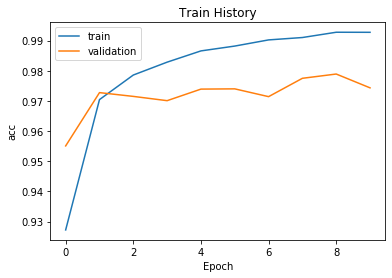

In [11]:
show_train_history(train_history, 'acc', 'val_acc')

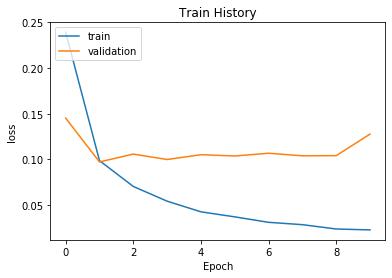

In [12]:
show_train_history(train_history, 'loss', 'val_loss')

## 評估模型準確率

In [13]:
scores = model.evaluate(x_test_image, y_test_label)
print('accuracy:', scores[1])

10000/10000 [==============================] - 0s 27us/step
accuracy: 0.9736
